# **DIABETES RISK PREDICTION**

## **1. Introduction**

### **1.1 Problem Statement**

This project aims to develop a predictive model which capable of predicting the indication of diabetes risk in women aged 21 to 81 years.
The dataset used contains information from sampling results, including several test parameters used as independent variables, namely:

*   Number of pregnancies
*   Blood Pressure
*   Skin Thickness
*   Insuline Hormon Level
*   Body Mass Index
*   Diabetes Pedigree Function
*   Age

The developed model should have the ability to predict the likelihood of someone having Diabetes (Outcome = 1) or not having Diabetes (Outcome = 0) based on diagnostic data provided.

### **1.2 Data Description**

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Variable</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">Pregnancies</td>
      <td style="font-size: 14px; text-align: left;">Number of pregnancies</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">Glucose</td>
      <td style="font-size: 14px; text-align: left;">Blood Glucose Level</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">BloodPressure</td>
      <td style="font-size: 14px; text-align: left;">Blood Pressure Level</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">SkinThickness</td>
      <td style="font-size: 14px; text-align: left;">Skin Thickness</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">Insulin</td>
      <td style="font-size: 14px; text-align: left;">Insulin Hormon Level</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">BMI</td>
      <td style="font-size: 14px; text-align: left;">Body Mass Index</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">DiabetesPedigreeFunction</td>
      <td style="font-size: 14px; text-align: left;">Percentage of Diabetes Probability based on Family History</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #4B0082; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 14px; color: #4B0082; text-align: left;">Age</td>
      <td style="font-size: 14px; text-align: left;">Age</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #0000FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 14px; color: #0000FF; text-align: left;">Outcome</td>
      <td style="font-size: 14px; text-align: left;">Result (<font color="#008000">1</font>: Yes, The individual has diabetes; <font color="#FF0000">0</font>: No, The individual is not diabetic)</td>
    </tr>
  </tbody>
</table>


## **2. Importing Library Package**

In [2]:
!pip install scikit-plot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import brier_score_loss
import scikitplot as skplt
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')


## **3. Exploratory Data Analysis**

### **3.1 Load Dataset**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dianrw/Diabetes-Risk-Prediction/main/Diabetes_Prediction.csv')

#### **3.1.2 Display Data Content**

In [5]:
styled_df = df.head(10).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#ffffff", "color": "#000000", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#5F9EA0")]}
])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


### **3.2 Basic Information**

#### **3.2.1 Number of rows, number of columns**

In [6]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


*The Dataset consist of 768 rows and 9 columns.*

#### **3.2.2 Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*The provided information is deemed appropriate. The data type is accurate, and no null values have been observed.*

#### **3.2.3 Count null/nan values**

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

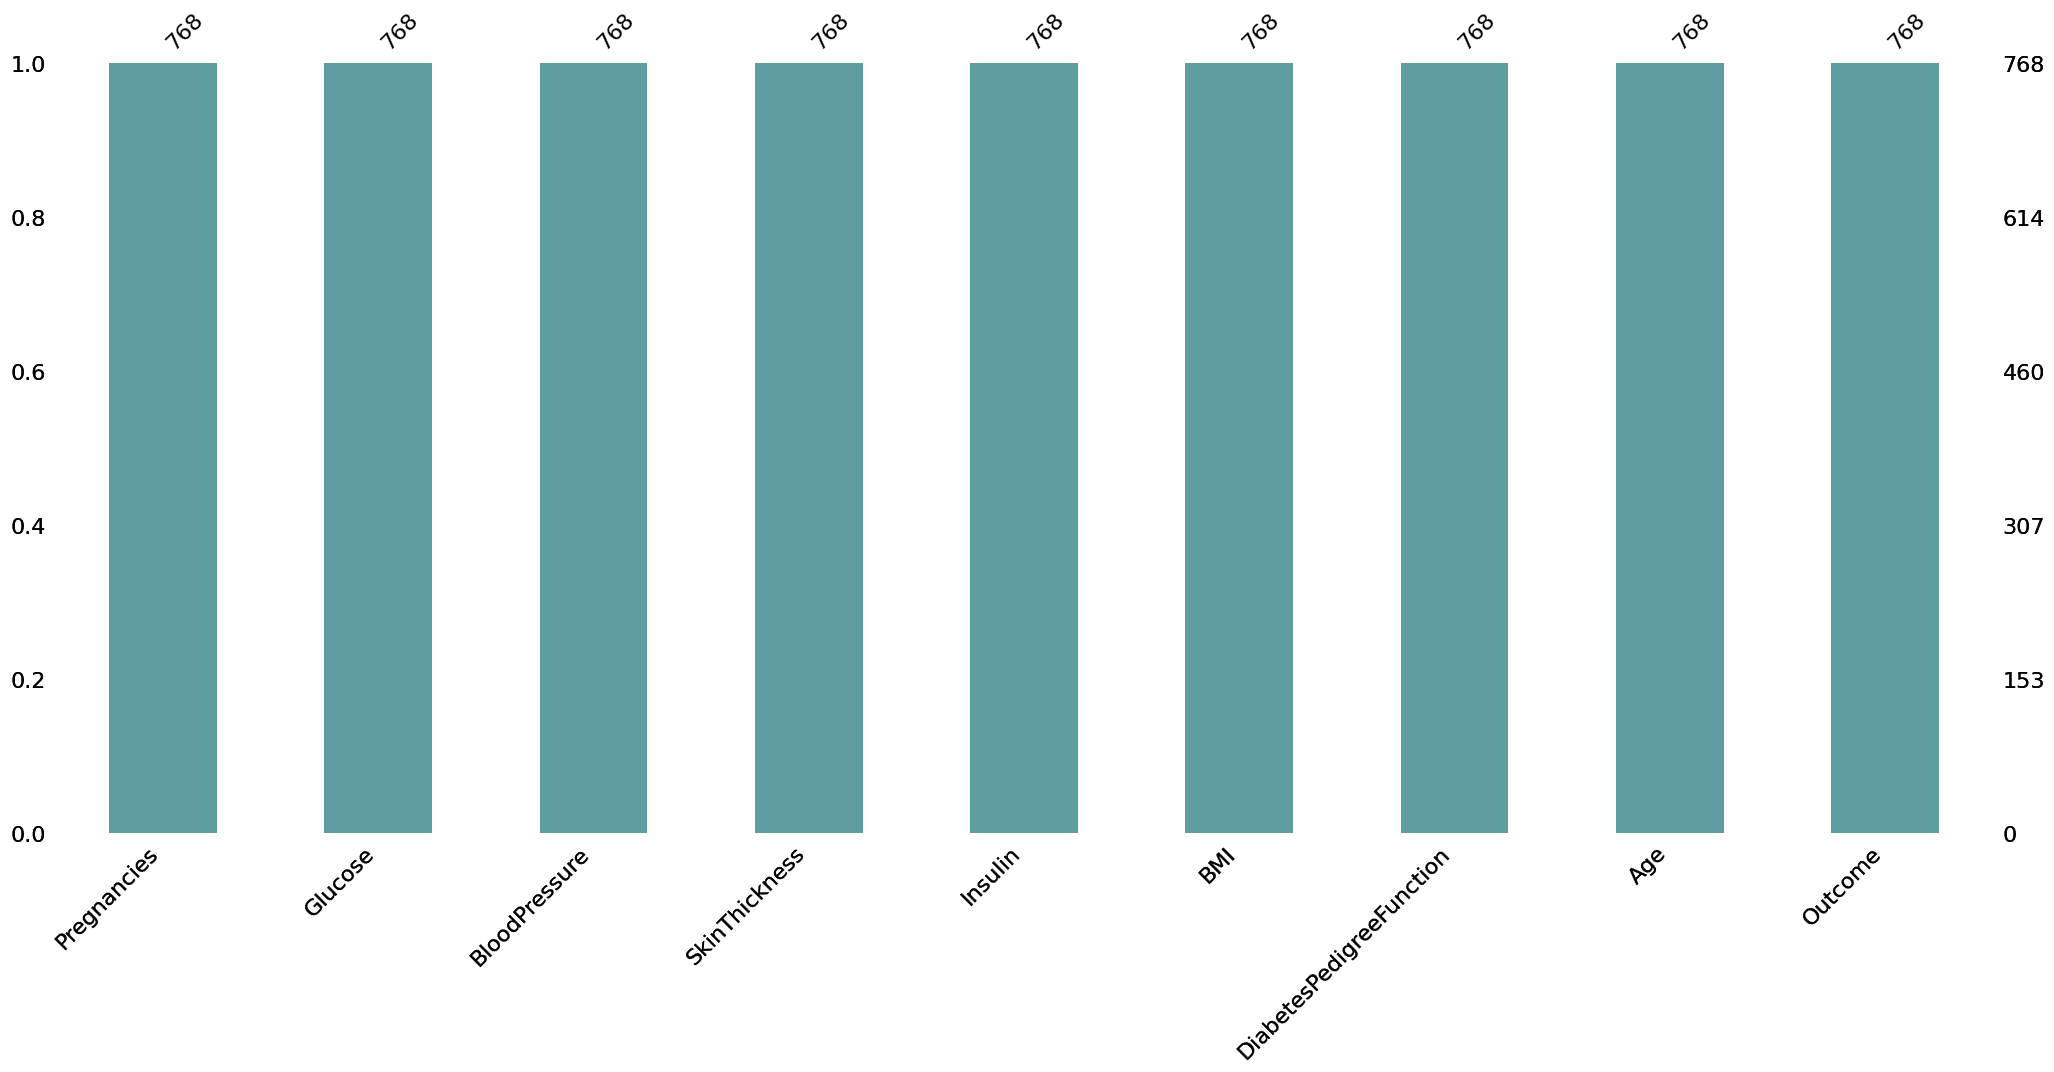

In [9]:
msno.bar(df)
msno.bar(df, color='#5F9EA0')
plt.show()

*There are no null values on the Dataset.*

#### **3.2.4 Description**

In [10]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#5F9EA0'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': '#ffffff', 'color':'black', 'border-collapse': 'collapse', 'margin': '10px'})

# Display the styled DataFrame

styled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **3.3 Data Vizualization**

#### **3.3.1 | Distributions of attributes**

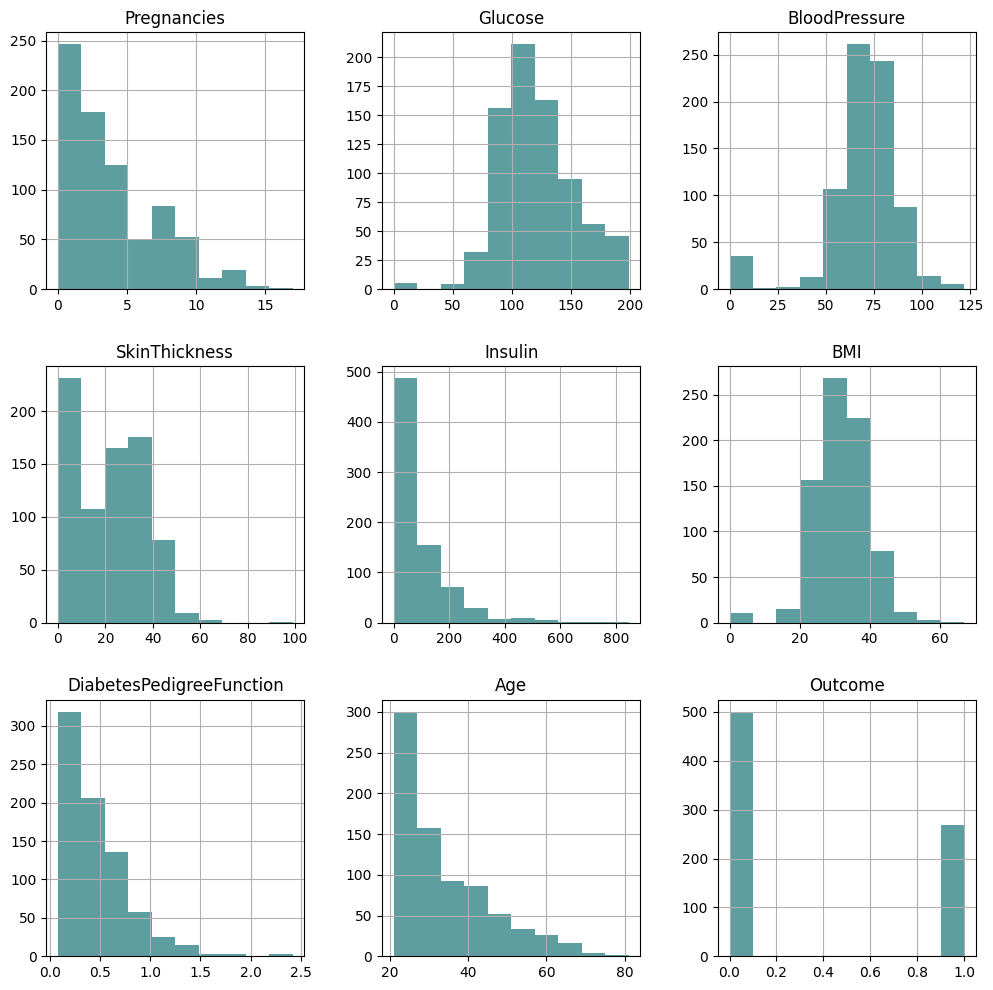

In [11]:
df.hist(figsize = (12,12), color='#5F9EA0')
plt.show()

#### **3.3.2 | Boxplot**

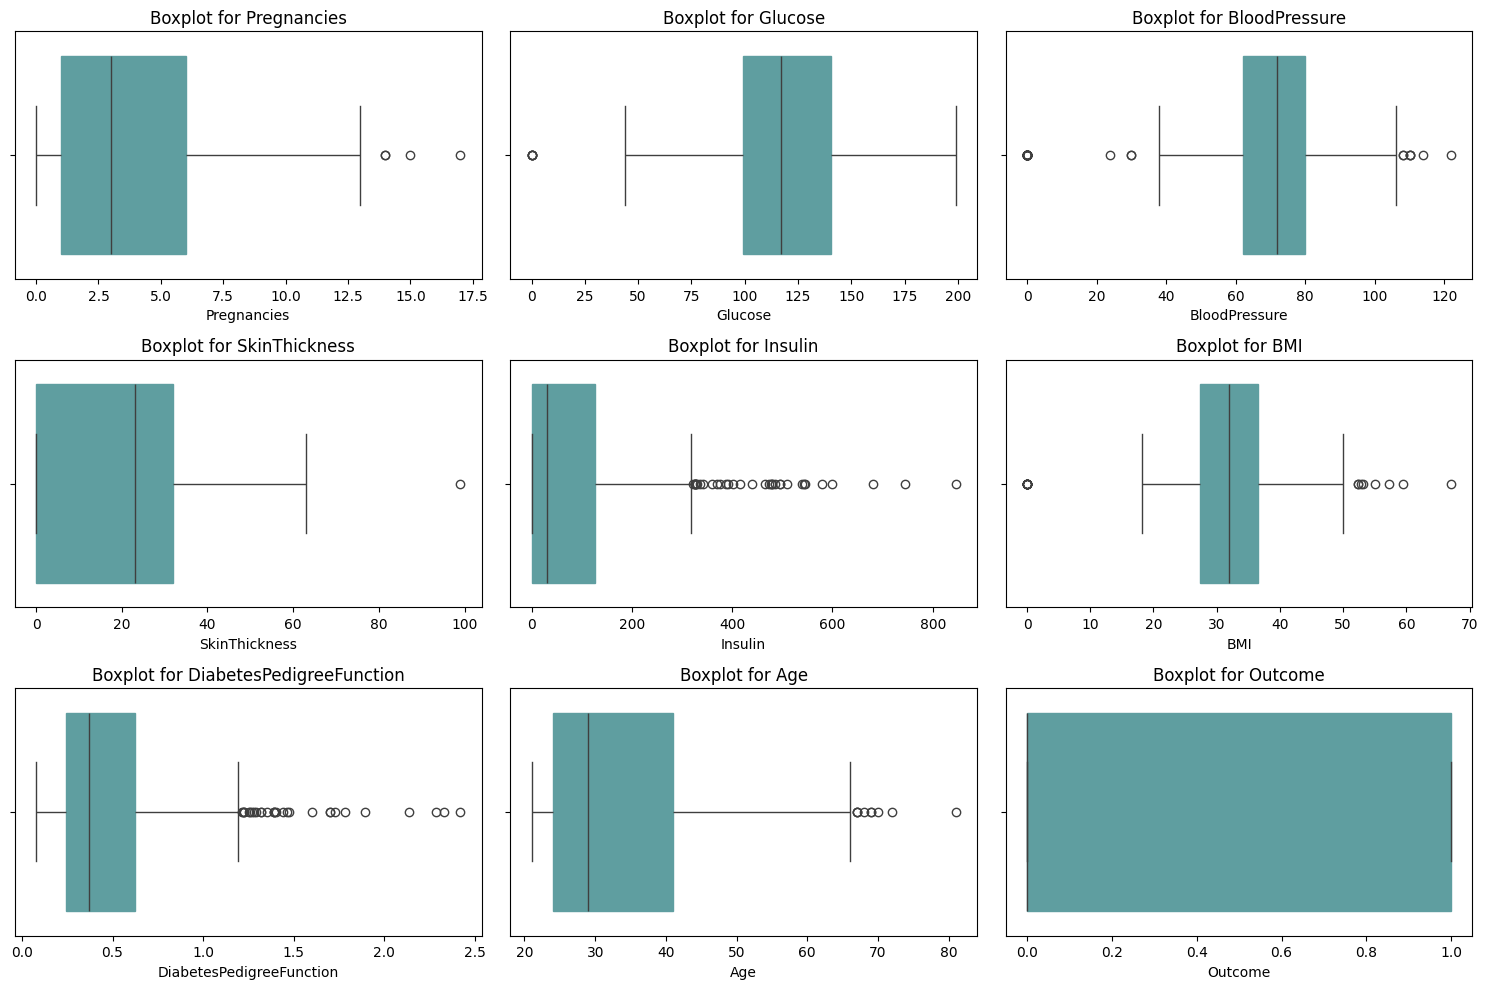

In [12]:
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i], boxprops=dict(facecolor='#5F9EA0', color='#5F9EA0'))
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### **3.3.3 | Pairplot of attributes**

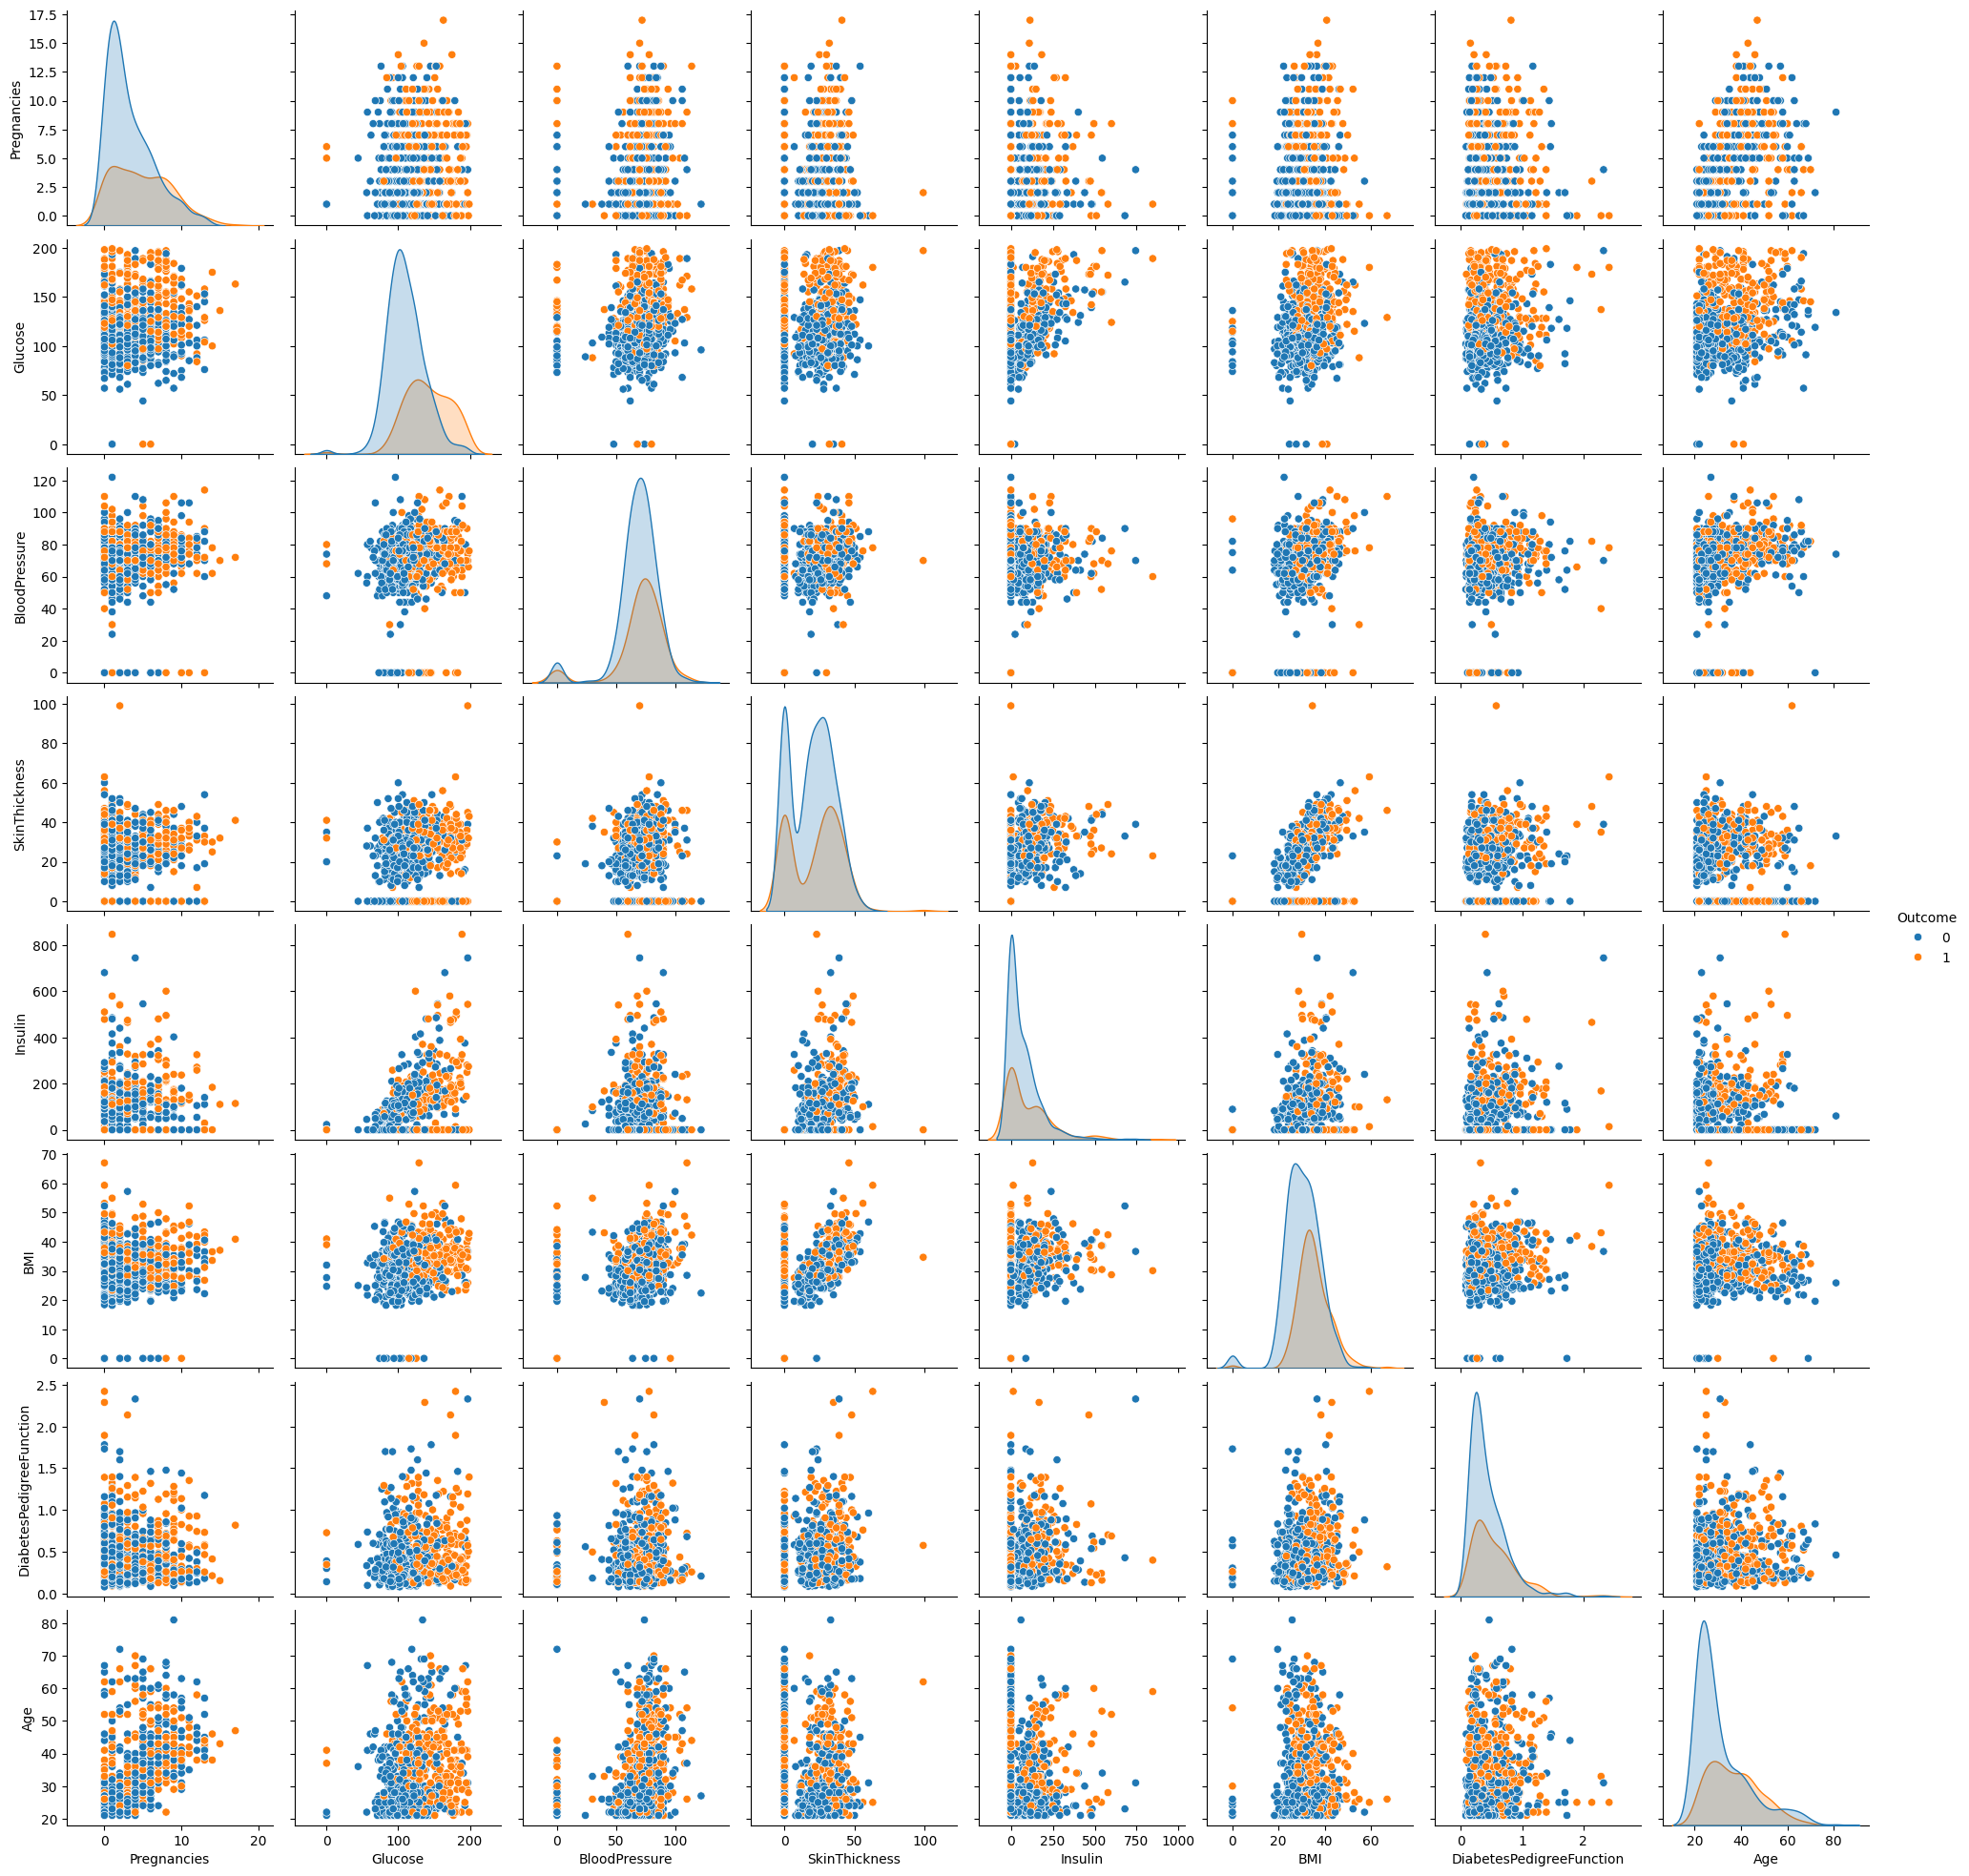

In [13]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

#### **3.3.4 | Correlation Matrix**

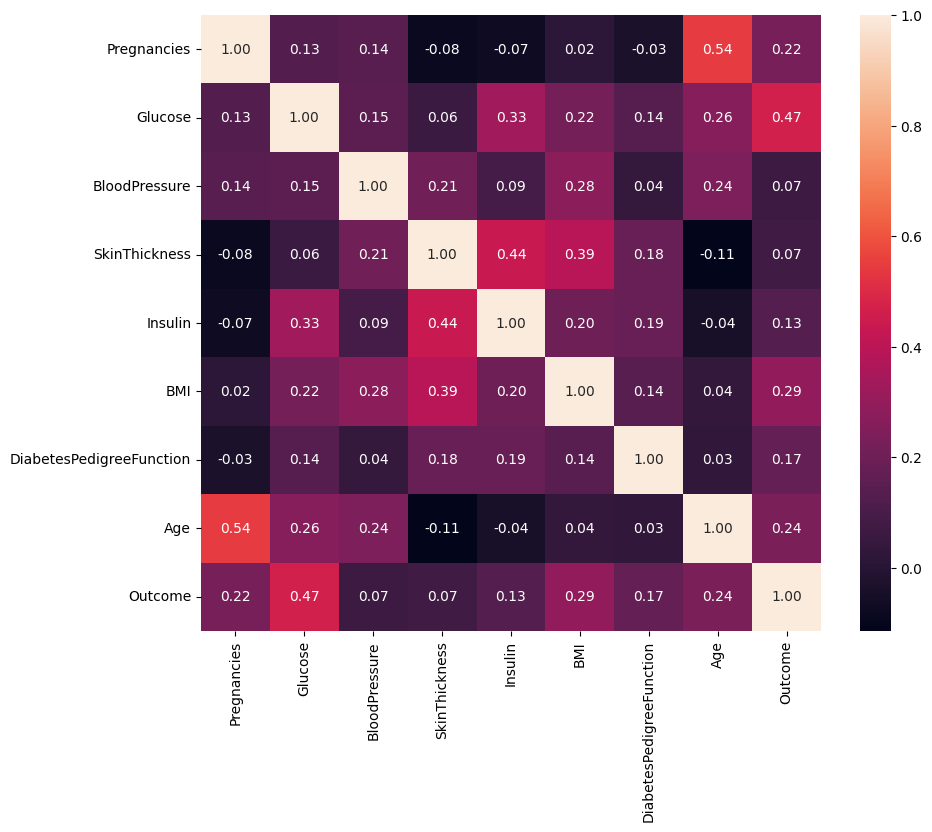

In [14]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

#### **3.3.5 | Class Distribution**

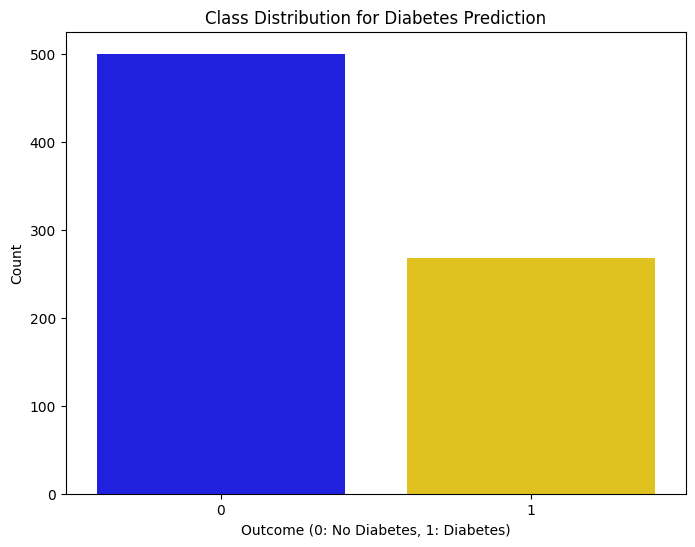

In [15]:
colors = ['#0000FF', '#FFD700']

plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette= colors)
plt.title('Class Distribution for Diabetes Prediction')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# **4 | Data Preprocessing**

### **4.1 | Remove Unnecessary Columns**

In [16]:
df.drop('Glucose', axis=1, inplace = True)

In [17]:
df.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


*In the dataset, Glucose variable has been removed. But It is noticable that there are still variable values that should not be zero, such as data in the SkinThickness, Insulin, and Blood Pressure variables. It is suspected that respondents did not fill in these data. Since these zero values would impact the model, they will be replaced with the mean values.*

### **4.2 | Handling Outliers**

In [18]:
numeric_columns = ['Insulin', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'Age', 'Pregnancies']

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

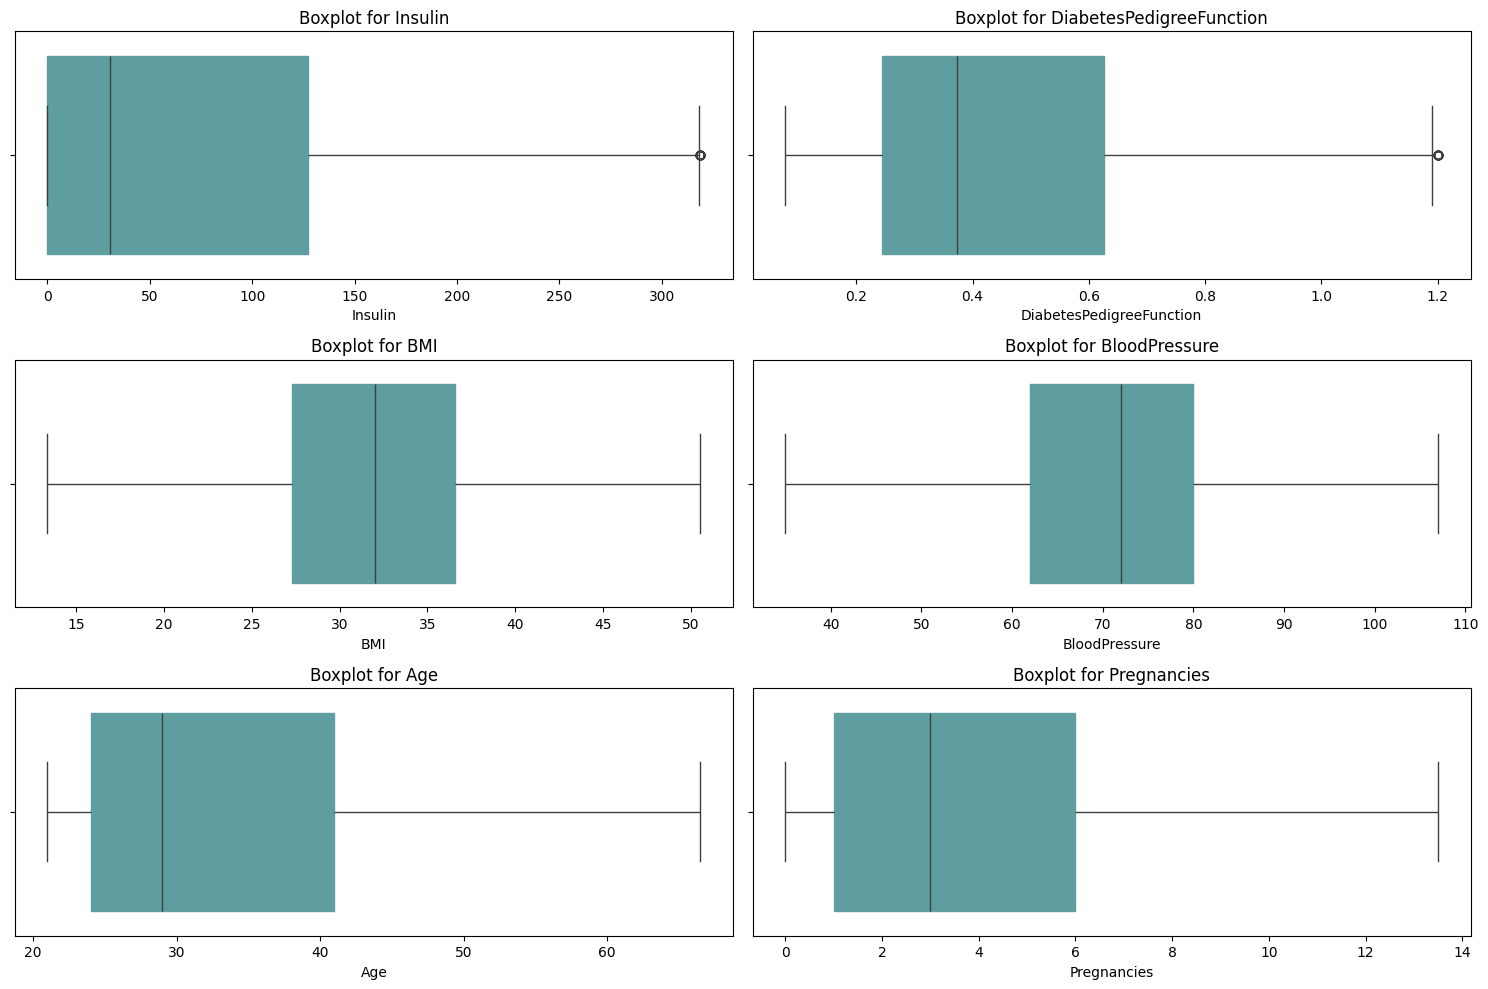

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Insulin', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'Age', 'Pregnancies']
num_rows, num_cols = 3, 2  # Update the number of rows and columns based on the length of numeric_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i], boxprops=dict(facecolor='#5F9EA0', color='#5F9EA0'))  # Assuming df is your DataFrame
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

*The Data Outliers have been handled.*

### **4.3 | Handling Zero Values in Variable**

In [20]:
# Calculate the mean of 'Insulin' for rows where 'Outcome' is 1
mean_insulin_diabetes = df[df['Outcome'] == 1].mean()
mean_insulin_nondiabetes = df[df['Outcome'] == 0].mean()
mean_SkinThickness_diabetes = df[df['Outcome'] == 1].mean()
mean_SkinThickness_nondiabetes = df[df['Outcome'] == 0].mean()


# Replace zero values in 'Insulin' for rows where 'Outcome' is 1 with the mean value
df.loc[(df['Insulin'] == 0) & (df['Outcome'] == 1), 'Insulin'] = mean_insulin_diabetes['Insulin']
df.loc[(df['Insulin'] == 0) & (df['Outcome'] == 0), 'Insulin'] = mean_insulin_nondiabetes['Insulin']
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 1), 'SkinThickness'] = mean_insulin_diabetes['SkinThickness']
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 0), 'SkinThickness'] = mean_insulin_nondiabetes['SkinThickness']

# Verify the changes
print(df[df['SkinThickness'] == 0]['SkinThickness'])

Series([], Name: SkinThickness, dtype: float64)


*The zero values in the variable have been replaced with the respective mean values for each outcome.*

### **4.4 | Handling Class Imbalance**

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE only on the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_train_resampled and y_train_resampled for training your machine learning model

X_train_resampled.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,35.0,19.664,65.132500,13.35,0.304,21.0
1,9.0,82.0,24.000,89.627799,28.20,1.201,50.0
2,1.0,46.0,19.000,83.000000,28.70,0.654,22.0
3,0.0,50.0,19.664,65.132500,21.90,0.254,65.0
4,6.0,80.0,37.000,318.750000,46.20,0.238,46.0


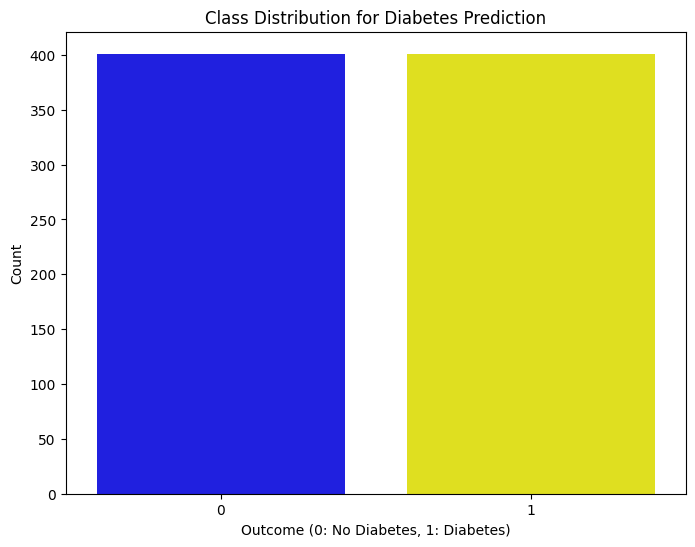

In [22]:
colors = ['#0000FF', '#FFFF00']

plt.figure(figsize=(8, 6))
sns.countplot(x="Outcome", data=pd.DataFrame({"Outcome":y_train_resampled.values}), palette= colors)
plt.title('Class Distribution for Diabetes Prediction')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

*The data balancing process utilizing SMOTE has been successfully executed, resulting in an equilibrium between the quantities of data labeled as 0 and 1.*

In [23]:
df.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,72.0,35.000000,89.627799,33.6,0.627,50.0,1
1,1.0,66.0,29.000000,65.132500,26.6,0.351,31.0,0
2,8.0,64.0,22.164179,89.627799,23.3,0.672,32.0,1
3,1.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,40.0,35.000000,168.000000,43.1,1.201,33.0,1


*The data has been cleaned, ready to process.*

# **5 | Machine Learning Modelling**

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Standardization using StandarScaler</b></span>

In [24]:
# Feature Scaling (Optional based on your dataset)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.092691,0.868648,-0.288811,0.209359,0.588593,1.445691
1,-0.848970,-0.330201,0.245583,-0.639517,-0.784254,-0.378104,-0.189304
2,1.245598,-0.471166,-0.464277,-0.288811,-1.252672,0.746206,-0.103252
3,-0.848970,-0.330201,-0.377482,-0.226213,-0.571337,-1.022568,-1.049828
4,-1.148194,-2.162737,0.868648,0.833265,1.557835,2.599041,-0.017199
...,...,...,...,...,...,...,...
763,1.844045,0.374620,2.218622,1.005072,0.109998,-1.008558,2.564372
764,-0.549746,-0.048273,0.037895,-0.639517,0.663583,-0.416632,-0.533513
765,0.347926,0.092691,-0.377482,0.031498,-0.841032,-0.749371,-0.275356
766,-0.848970,-0.753094,-0.464277,-0.288811,-0.287447,-0.385109,1.187534


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Splitting Data For The Training</b></span>

In [25]:
#Train test split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5.1 | Algorithm Model**

### **5.1.1 | Logistic Regression**

In [26]:
BS = {}
log_reg = LogisticRegression(C=2, penalty='l1', solver='liblinear', max_iter=3000)
log_reg.fit(X_train, y_train)
proba_predictions = log_reg.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['Logistic Regression'] = brier_score

print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.2006304394109382


### **5.1.2 | Random Forest**

In [27]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
proba_predictions = rf_classifier.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['Random Forest'] = brier_score
print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.08849090909090908


### **5.1.3 | Decision Tree**

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
proba_predictions = dtree.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])

print(f"Brier Score: {brier_score}")
BS['Decision Tree'] = brier_score


(154, 2)
Brier Score: 0.14935064935064934


### **5.1.4 | KNeighborsClassifier**

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)  # Change the value of k as needed
knn.fit(X_train, y_train)
proba_predictions = knn.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['KNeighbors'] = brier_score
print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.13203463203463206


### **5.1.5 | AdaBoost Classifier**

In [30]:
weak_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=weak_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
proba_predictions = adaboost_model.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['AdaBoost'] = brier_score
print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.2292142728160923


### **5.1.6 | XGBoost Classifier**

In [31]:
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
xgboost_model.fit(X_train, y_train)
proba_predictions = xgboost_model.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['XGBoost'] = brier_score
print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.11466212609265182


### **5.1.7 | Gradient Boosting Classifier**

In [32]:
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)
proba_predictions = gbm_model.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['Gradient Boosting'] = brier_score

print(f"Brier Score: {brier_score}")


(154, 2)
Brier Score: 0.10193777524087715


### **5.1.8 | Multilayer Preceptron**

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, ), activation='relu', solver='adam',
                    alpha=0.0001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.01, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
proba_predictions = mlp.predict_proba(X_test)
print(proba_predictions.shape)
brier_score = brier_score_loss(y_test, proba_predictions[:,1])
BS['Multilayer Perceptron'] = brier_score
print(f"Brier Score: {brier_score}")

(154, 2)
Brier Score: 0.19058445136820942


In [34]:
BS_list = []
for idx in BS.keys():
  BS_list.append({"Algorithm":idx,"BS":BS[idx]})

BS_list = pd.DataFrame(BS_list).sort_values(by='BS', ascending=True, ignore_index=True)
BS_list

,Algorithm,BS
0,Random Forest,0.088491
1,Gradient Boosting,0.101938
2,XGBoost,0.114662
3,KNeighbors,0.132035
4,Decision Tree,0.149351
5,Multilayer Perceptron,0.190584
6,Logistic Regression,0.200630
7,AdaBoost,0.229214


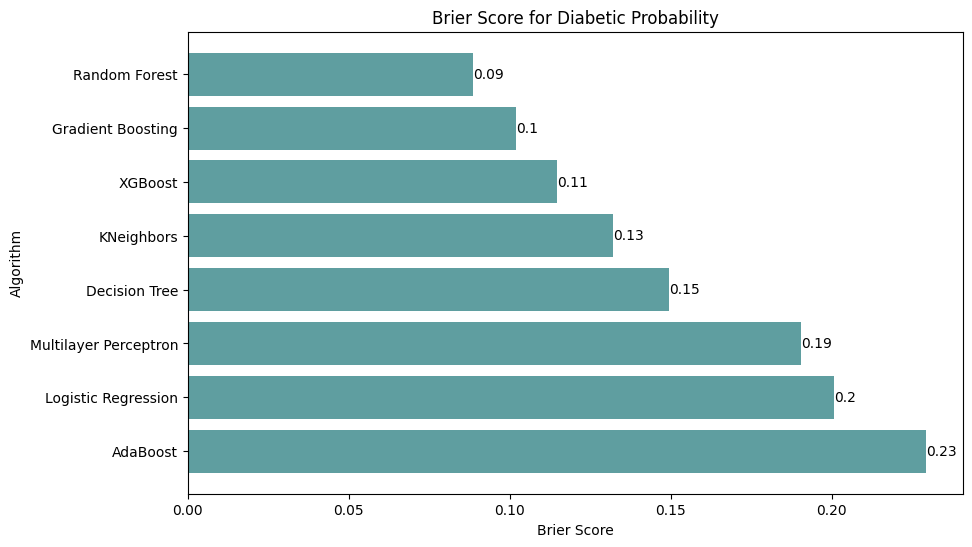

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
BS_list = BS_list.sort_values(by='BS', ascending=False, ignore_index=True)

# Create horizontal bar plot
plt.barh(BS_list['Algorithm'], BS_list['BS'], color="#5F9EA0")

# Add text labels
for i, v in enumerate(BS_list['BS']):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')

# Set labels and title
plt.xlabel('Brier Score')
plt.ylabel('Algorithm')
plt.title("Brier Score for Diabetic Probability")

# Show the plot
plt.show()

*The Brier Score is an evaluation metric for probability models. The closer the score is to 0, the more accurate the model. Conversely, the closer the score is to 1, the less accurate the model. Lower values are preferred as they indicate smaller prediction errors. There are three models that exhibit the best Brier Scores (closest to 0): Random Forest, Gradient Boosting, and XGBoost. These will be analyzed further in depth.*

## **5.2 | Model Tuning**

### **5.2.1 | Hyperparameter Tuning for Random Forest**

In [36]:
# Define the Random Forest Classifier
rfc = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_rfc.best_params_)

# Performing probability prediction for test data
proba_predictions = grid_rfc.predict_proba(X_test)[:, 1]

BS['Random Forest'] = brier_score

# Calculate Brier Score
brier_score = brier_score_loss(y_test, proba_predictions)
BSS = 1 - (BS['Random Forest']/brier_score)
print(f"Brier Score Tuning: {brier_score}")
print(f"Brier Score Before Tuning: {BS['Random Forest']}")
print(f"Brier Skill Score : {BSS}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 300}
Brier Score Tuning: 0.09071679494939726
Brier Score Before Tuning: 0.19058445136820942
Brier Skill Score : -1.1008728480158427


### **5.2.2 | Hyperparameter Tuning for Gradient Boosting Classifier**

In [37]:
# Define the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
grid_gbc.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_gbc.best_params_)

# Performing probability prediction for test data
proba_predictions = grid_gbc.predict_proba(X_test)[:, 1]

BS['GradientBoostingClassifier'] = brier_score

# Calculate Brier Score
brier_score = brier_score_loss(y_test, proba_predictions)
BSS = 1 - (BS['GradientBoostingClassifier']/brier_score)
print(f"Brier Score Tuning: {brier_score}")
print(f"Brier Score Before Tuning: {BS['GradientBoostingClassifier']}")
print(f"Brier Skill Score : {BSS}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Brier Score Tuning: 0.1086993674673368
Brier Score Before Tuning: 0.09071679494939726
Brier Skill Score : 0.16543401251477519


### **5.2.3 | Hyperparameter Tuning for XGBoost Classifier**

In [38]:
# Define the Gradient Boosting Classifier
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_xgb.best_params_)

# Performing probability prediction for test data
proba_predictions = grid_xgb.predict_proba(X_test)[:, 1]

BS['XGBClassifier'] = brier_score

# Calculate Brier Score
brier_score = brier_score_loss(y_test, proba_predictions)
BSS = 1 - (BS['XGBClassifier']/brier_score)
print(f"Brier Score Tuning: {brier_score}")
print(f"Brier Score Before Tuning: {BS['XGBClassifier']}")
print(f"Brier Skill Score : {BSS}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}
Brier Score Tuning: 0.0955166152071337
Brier Score Before Tuning: 0.1086993674673368
Brier Skill Score : -0.1380152786153015


## **5.5 | ROC**

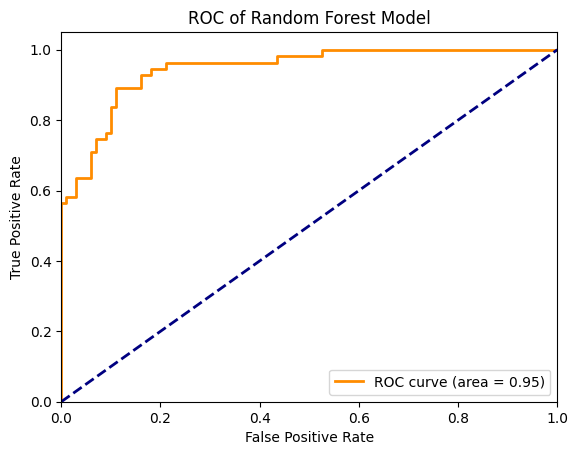

In [39]:
all_roc = []
# Assuming `grid_rfc` is your Random Forest model
y_proba_grid_rfc = grid_rfc.predict_proba(X_test)

# Plot ROC curve using matplotlib
fpr, tpr, thresholds = skplt.metrics.roc_curve(y_test, y_proba_grid_rfc[:, 1])
roc_auc = skplt.metrics.auc(fpr, tpr)
all_roc.append({
    "name":"Random Forest",
    "fpr":fpr,
    "tpr":tpr,
    "threshold":thresholds,
    "roc_auc":roc_auc
})

plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Random Forest Model')
plt.legend(loc="lower right")
plt.show()


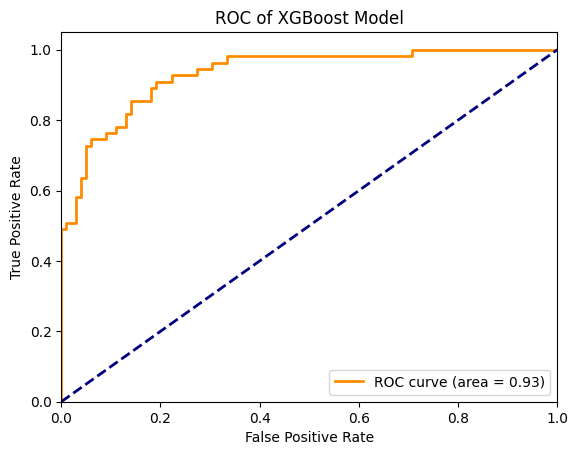

In [40]:
# Assuming `grid_xgb` is your XGBoost model
y_proba_xgboost_model = xgboost_model.predict_proba(X_test)

# Plot ROC curve using matplotlib
fpr, tpr, thresholds = skplt.metrics.roc_curve(y_test, y_proba_xgboost_model[:, 1])
roc_auc = skplt.metrics.auc(fpr, tpr)

all_roc.append({
    "name":"XGBoost",
    "fpr":fpr,
    "tpr":tpr,
    "threshold":thresholds,
    "roc_auc":roc_auc
})

plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of XGBoost Model')
plt.legend(loc="lower right")
plt.show()

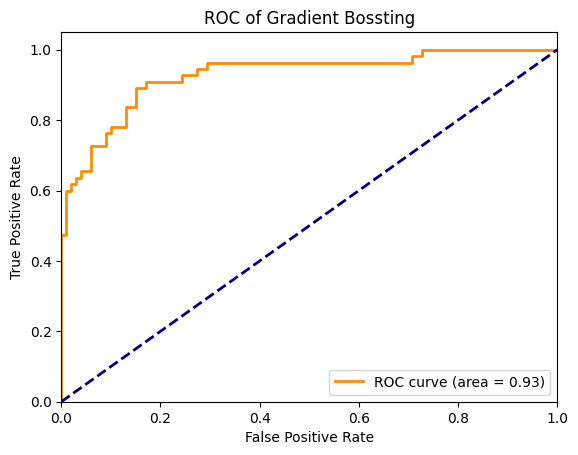

In [41]:
y_proba_gbm_model = gbm_model.predict_proba(X_test)

# Plot ROC curve using matplotlib
fpr, tpr, thresholds = skplt.metrics.roc_curve(y_test, y_proba_gbm_model[:, 1])
roc_auc = skplt.metrics.auc(fpr, tpr)
all_roc.append({
    "name":"Gradient Boosting",
    "fpr":fpr,
    "tpr":tpr,
    "threshold":thresholds,
    "roc_auc":roc_auc
})

plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Gradient Bossting')
plt.legend(loc="lower right")
plt.show()

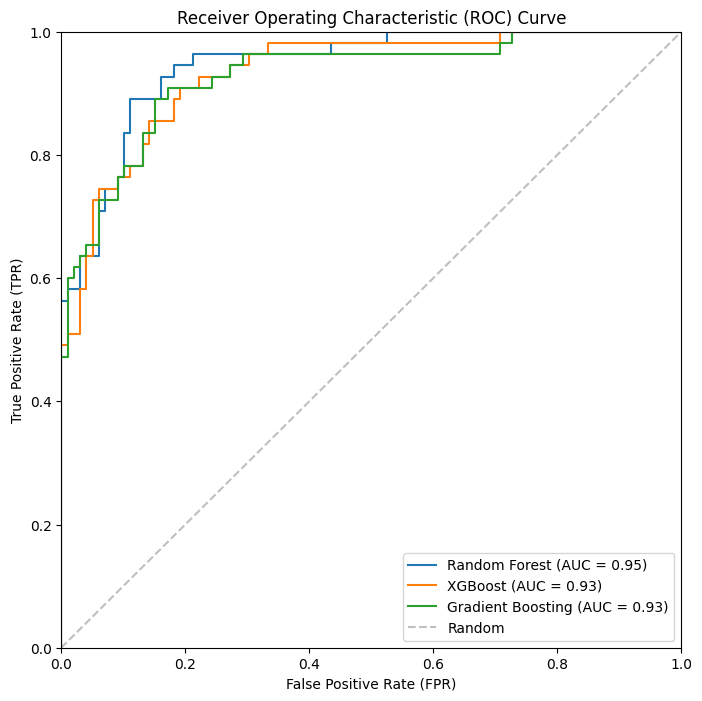

In [42]:
# Create ROC plot for each model
plt.figure(figsize=(8, 8))

for roc_data in all_roc:
    fpr = roc_data["fpr"]
    tpr = roc_data["tpr"]
    roc_auc = roc_data["roc_auc"]
    plt.plot(fpr, tpr, label=f'{roc_data["name"]} (AUC = {roc_auc:.2f})')

# Add reference line for random model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random', alpha=0.5)

# Adjust layout and label
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show plot
plt.show()

## **5.4 | Features Importance**

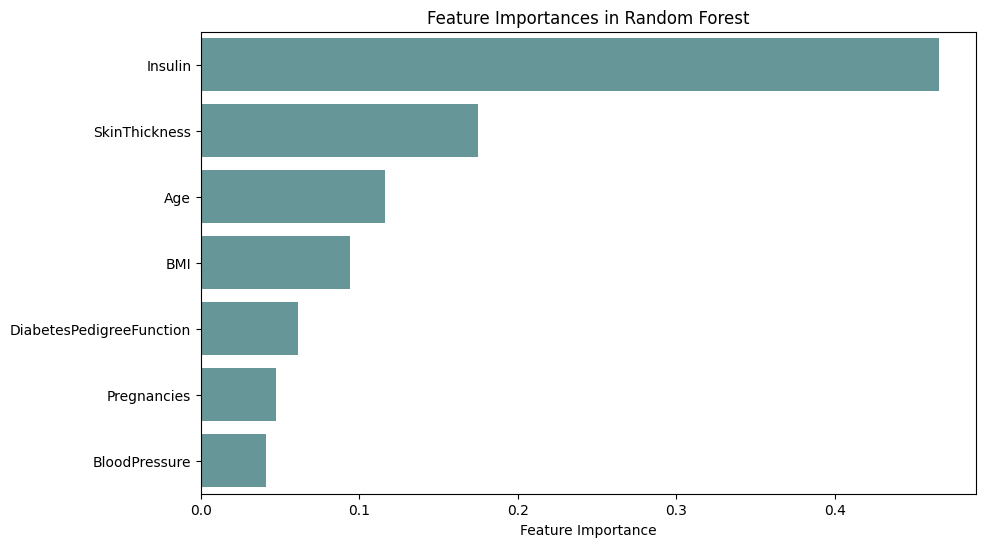

In [43]:
# Using .feature_importances_ to get the importance of features
feature_importances = grid_rfc.best_estimator_.feature_importances_

# Create DataFrame for Visualization
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='#5F9EA0')
plt.title('Feature Importances in Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.show()

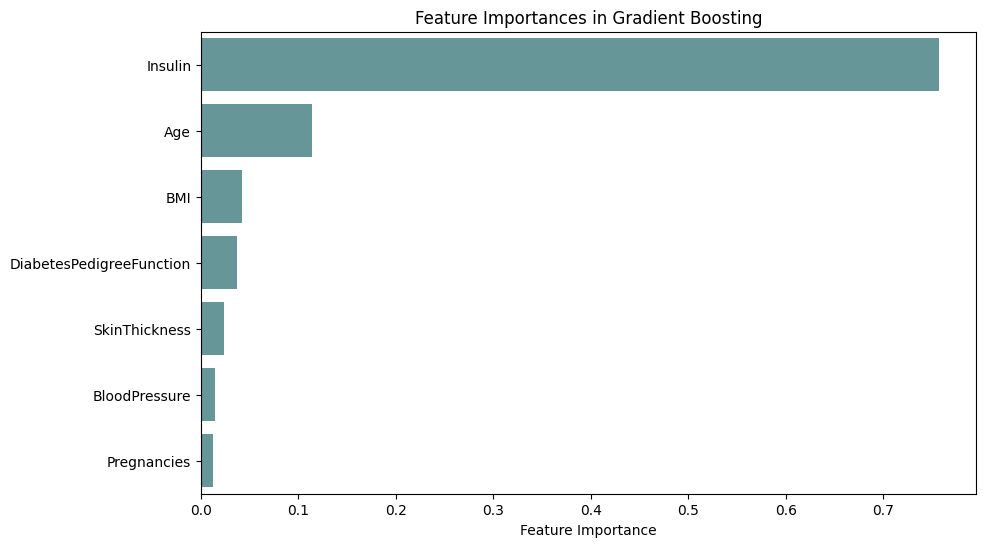

In [44]:
# Asumsikan gbm_model adalah model Gradient Boosting yang telah di-fit
# Menggunakan .feature_importances_ untuk mendapatkan pentingnya fitur
feature_importances_gbm = gbm_model.feature_importances_

# Membuat DataFrame untuk visualisasi
feature_importances_df_gbm = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gbm})

# Mengurutkan DataFrame berdasarkan pentingnya fitur
feature_importances_df_gbm = feature_importances_df_gbm.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_gbm, color='#5F9EA0')
plt.title('Feature Importances in Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('')
plt.show()

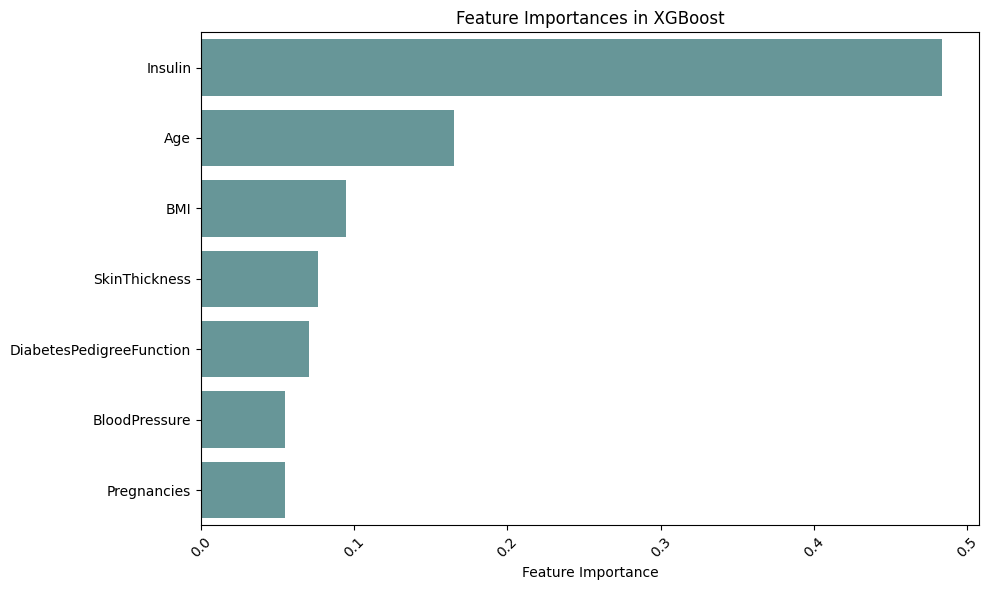

In [45]:
# Using .feature_importances_ to get the importance of features
feature_importances_xgb = xgboost_model.feature_importances_

# Create DataFrame for Visualization
features = X.columns
feature_importances_df_xgb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})

# Sorting DataFrame based on feature importance
feature_importances_df_xgb = feature_importances_df_xgb.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_xgb, color='#5F9EA0')
plt.title('Feature Importances in XGBoost')
plt.xlabel('Feature Importance')
plt.xticks(rotation=45)
plt.ylabel('')
plt.tight_layout()  # Ajust layout to make room for the rotated x-axis labels
plt.show()

# **6 | Conclusion**

Based on the Brier Score, Random Forest is the best algorithmic model for predicting the probability of someone suffering from diabetes. Random Forest has a Brier score of 0.09. The interpretation of the Brier score is that the closer it is to the value of 0, the better the model's probability predictions match the actual observations.

Based on ROC indicates very good performance, where the model can maximize the identification of positive cases while minimizing errors on negative cases.

Random Forest with AUC =0.948 (a value close to 1 indicates excellent performance, while a value close to 0.5 indicates performance no better than chance) has excellent discriminatory ability, capable of effectively distinguishing between positive and negative classes. This makes it a useful tool for applications where it's important to differentiate between these two classes, such as in medical diagnosis.

***In the summary, based on the evaluation metrics, the Random Forest algorithm is the best model for predicting the probability of someone being at risk of diabetes or not.***